In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

pd.set_option('display.max_columns', 200)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8')
# Set Matplotlib defaults
plt.rc('figure', figsize=(8,8), dpi=200)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)
plt.rc('animation', html='html5')
plt.tight_layout()

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

# Data Understanding

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
562   25    Male        120.6        1.83      179      120           51   
485   38    Male         83.6        1.74      164      151           51   
635   34  Female         54.2        1.52      190      132           60   
841   50  Female         61.6        1.75      192      166           74   
133   21    Male        125.2        1.66      196      159           60   
850   48  Female         69.1        1.60      191      166           53   
82    24  Female         72.9        1.76      175      127           68   
435   51  Female         56.3        1.50      182      142           66   
108   52  Female         79.4        1.59      166      163           59   
795   40    Male         81.7        1.74      166      133           58   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
562                      1.04            686.0       Cardio            22.3   
485                      1.66           1379.0       Cardio            11.6   
635                      1.13            746.0       Cardio            31.0   
841                      1.22            911.0     Strength            25.5   
133                      1.38           1207.0         HIIT            29.8   
850                      1.34           1001.0     Strength            26.1   
82                       0.86            546.0         Yoga            30.8   
435                      1.43            914.0       Cardio            27.4   
108                      1.39           1020.0     Strength            26.6   
795                      0.91            666.0         Yoga            27.0   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
562                    2.5                              3                 2   
485                    3.5                              5                 3   
635                    2.2                              3                 1   
841                    2.2                              4                 2   
133                    3.4                              3                 2   
850                    2.0                              4                 2   
82                     1.5                              3                 1   
435                    2.4                              3                 1   
108                    1.5                              3                 2   
795                    2.7                              2                 1   

       BMI  
562  36.01  
485  27.61  
635  23.46  
841  20.11  
133  45.43  
850  26.99  
82   23.53  
435  25.02  
108  31.41  
795  26.99

In [5]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

# Data Preparation

In [8]:
df = df.rename(columns={'Weight (kg)': 'Weight', 
                  'Height (m)': 'Height',
                  'Session_Duration (hours)': 'Session_Duration',
                  'Water_Intake (liters)': 'Water_Intake',
                  'Workout_Frequency (days/week)': 'Workout_Frequency'})

Doubling checking the columns to see whether rename has applied to the df

In [9]:
df.head(3)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   

   Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   

   Water_Intake  Workout_Frequency  Experience_Level    BMI  
0           3.5                  4                 3  30.20  
1           2.1                  4                 2  32.00  
2           2.3                  4                 2  24.71

In [10]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

# Feature Understanding via Data Visualization

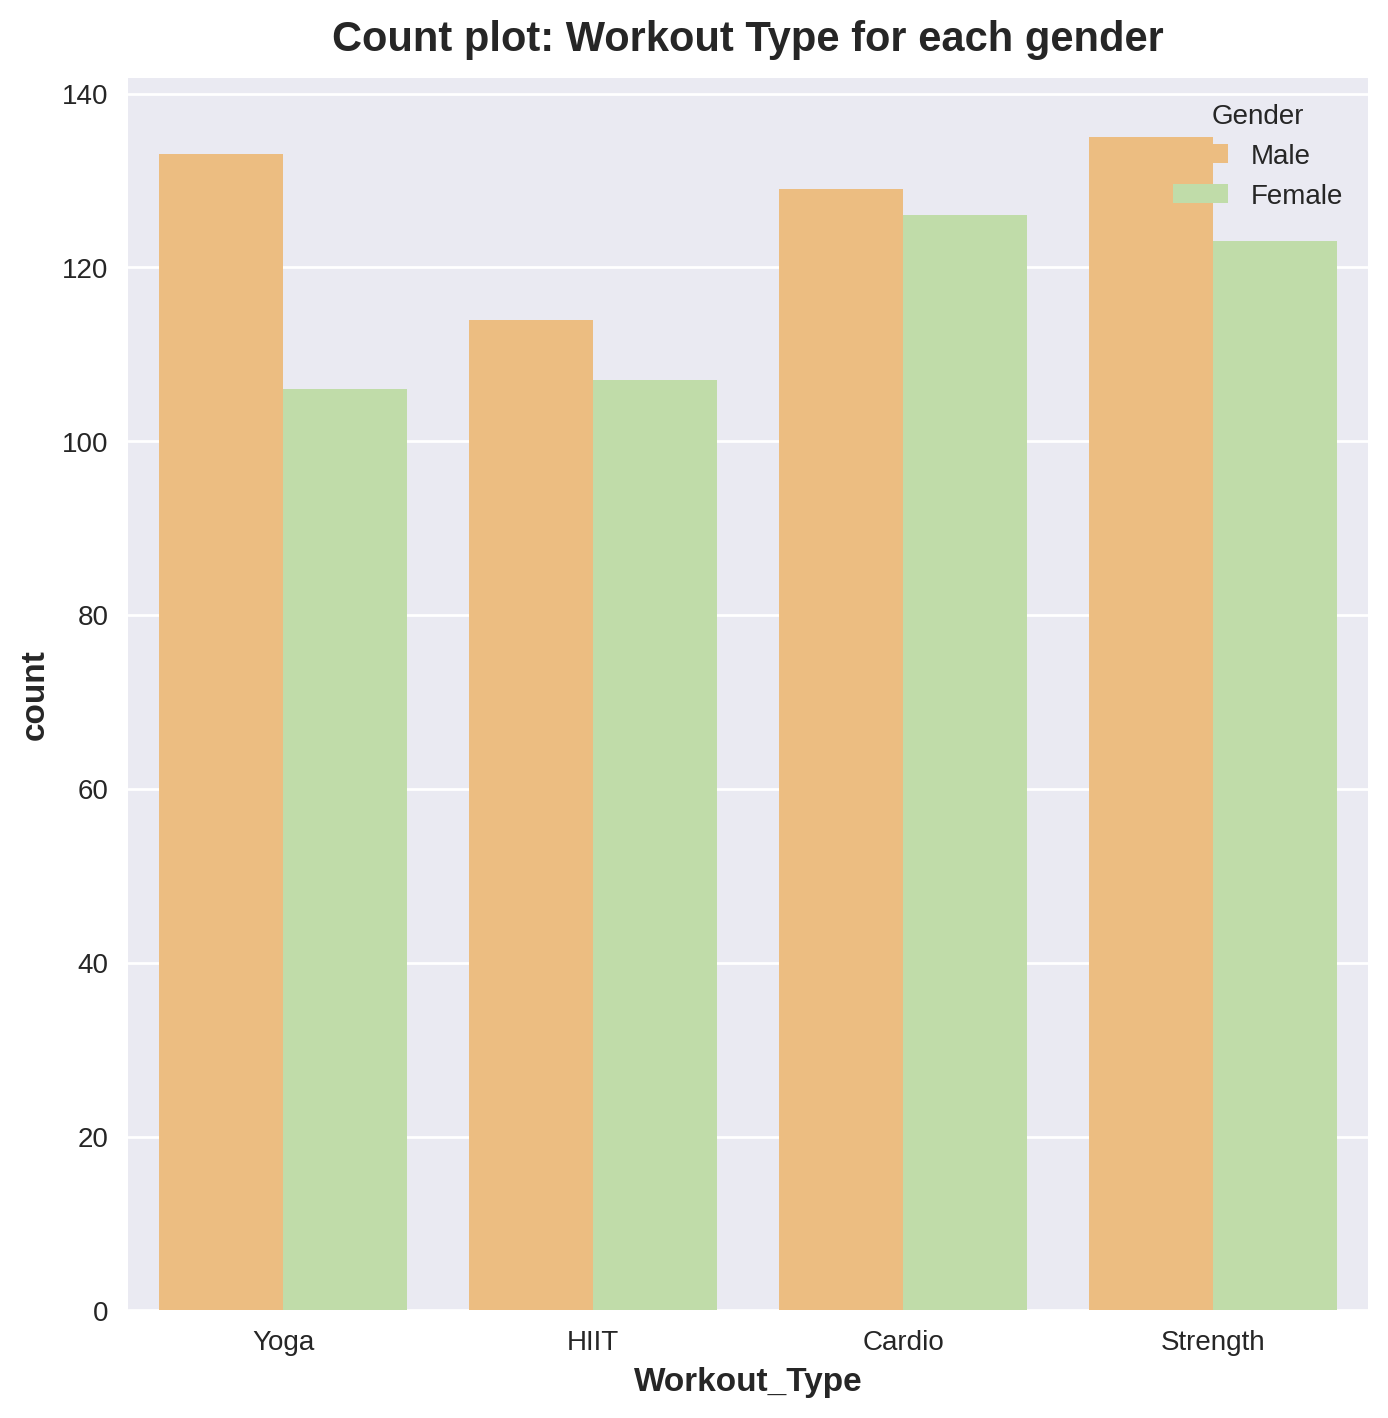

In [11]:
sns.countplot(x='Workout_Type', hue='Gender', palette='Spectral', data=df)
plt.title('Count plot: Workout Type for each gender')
plt.show()

Text(0.5, 1.0, 'Barplot: Workout Type influence on Calories Burned')

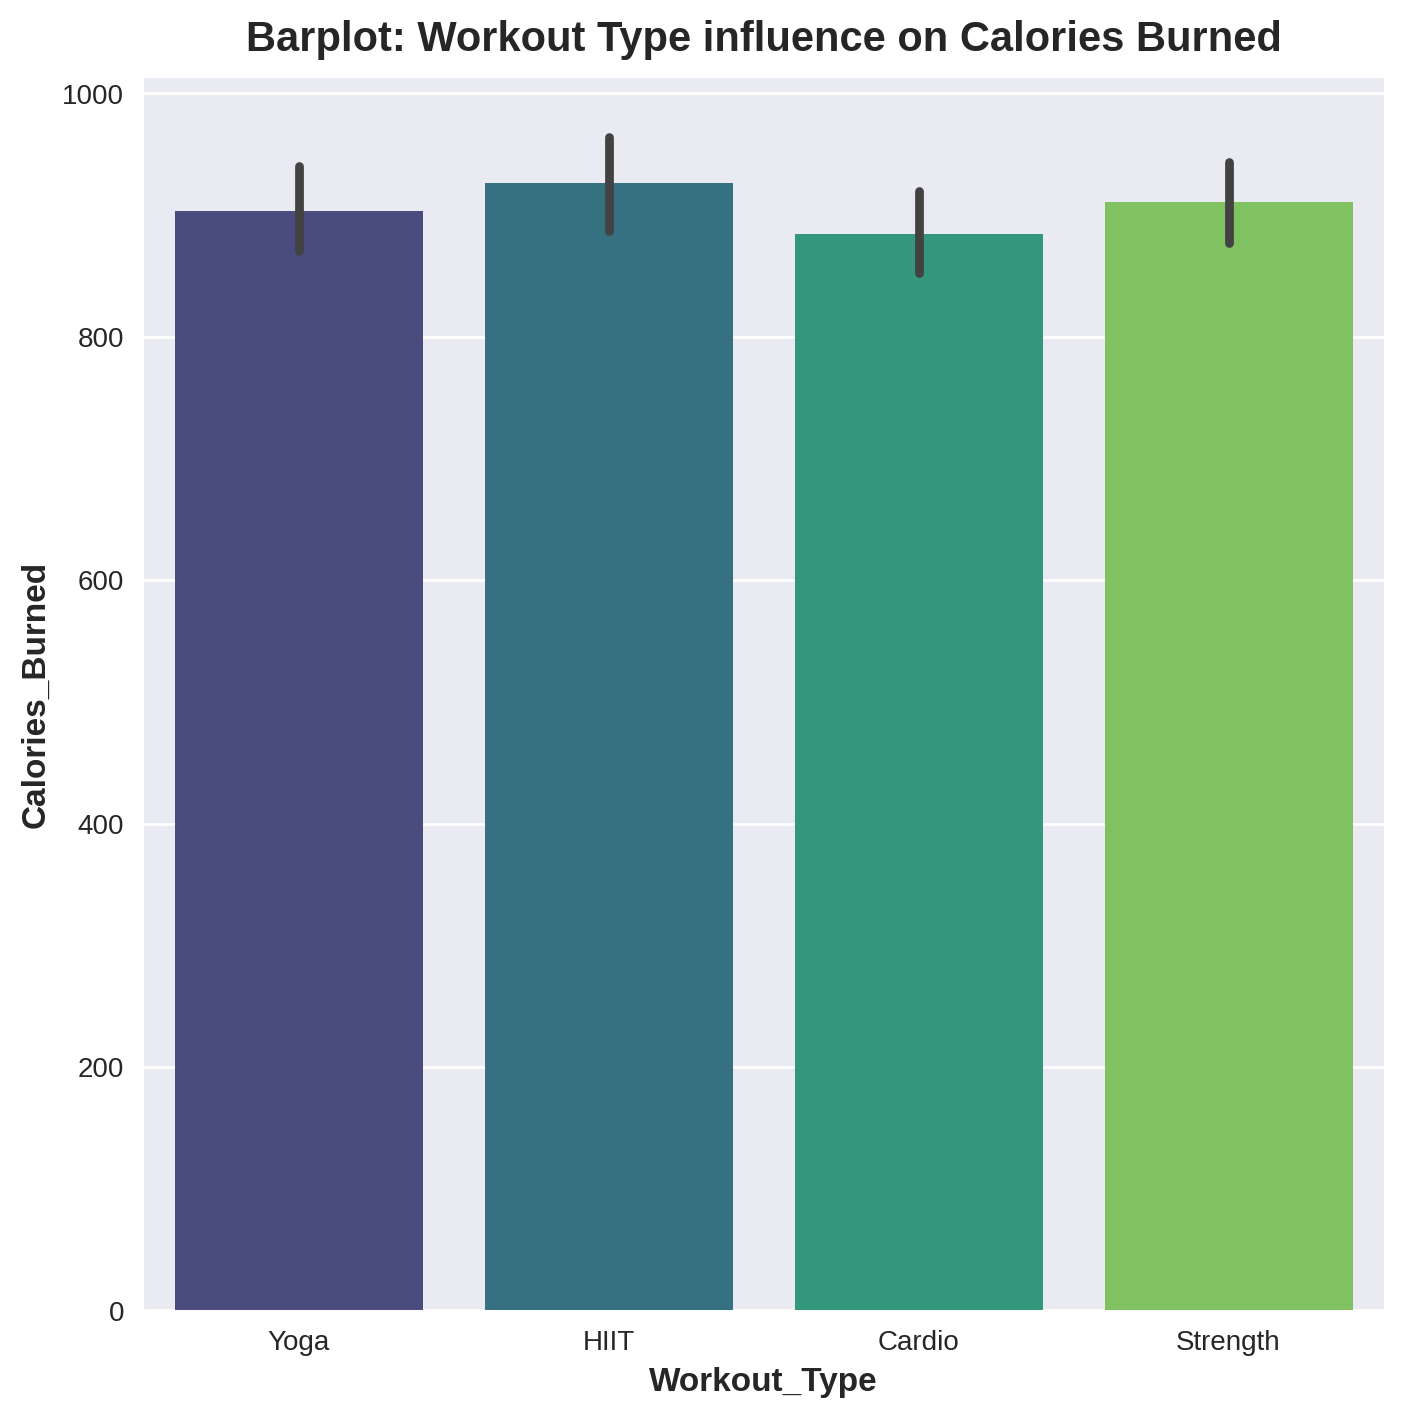

In [12]:
sns.barplot(x='Workout_Type', y='Calories_Burned', palette='viridis', data=df)
plt.title('Barplot: Workout Type influence on Calories Burned')

## Scatterplot

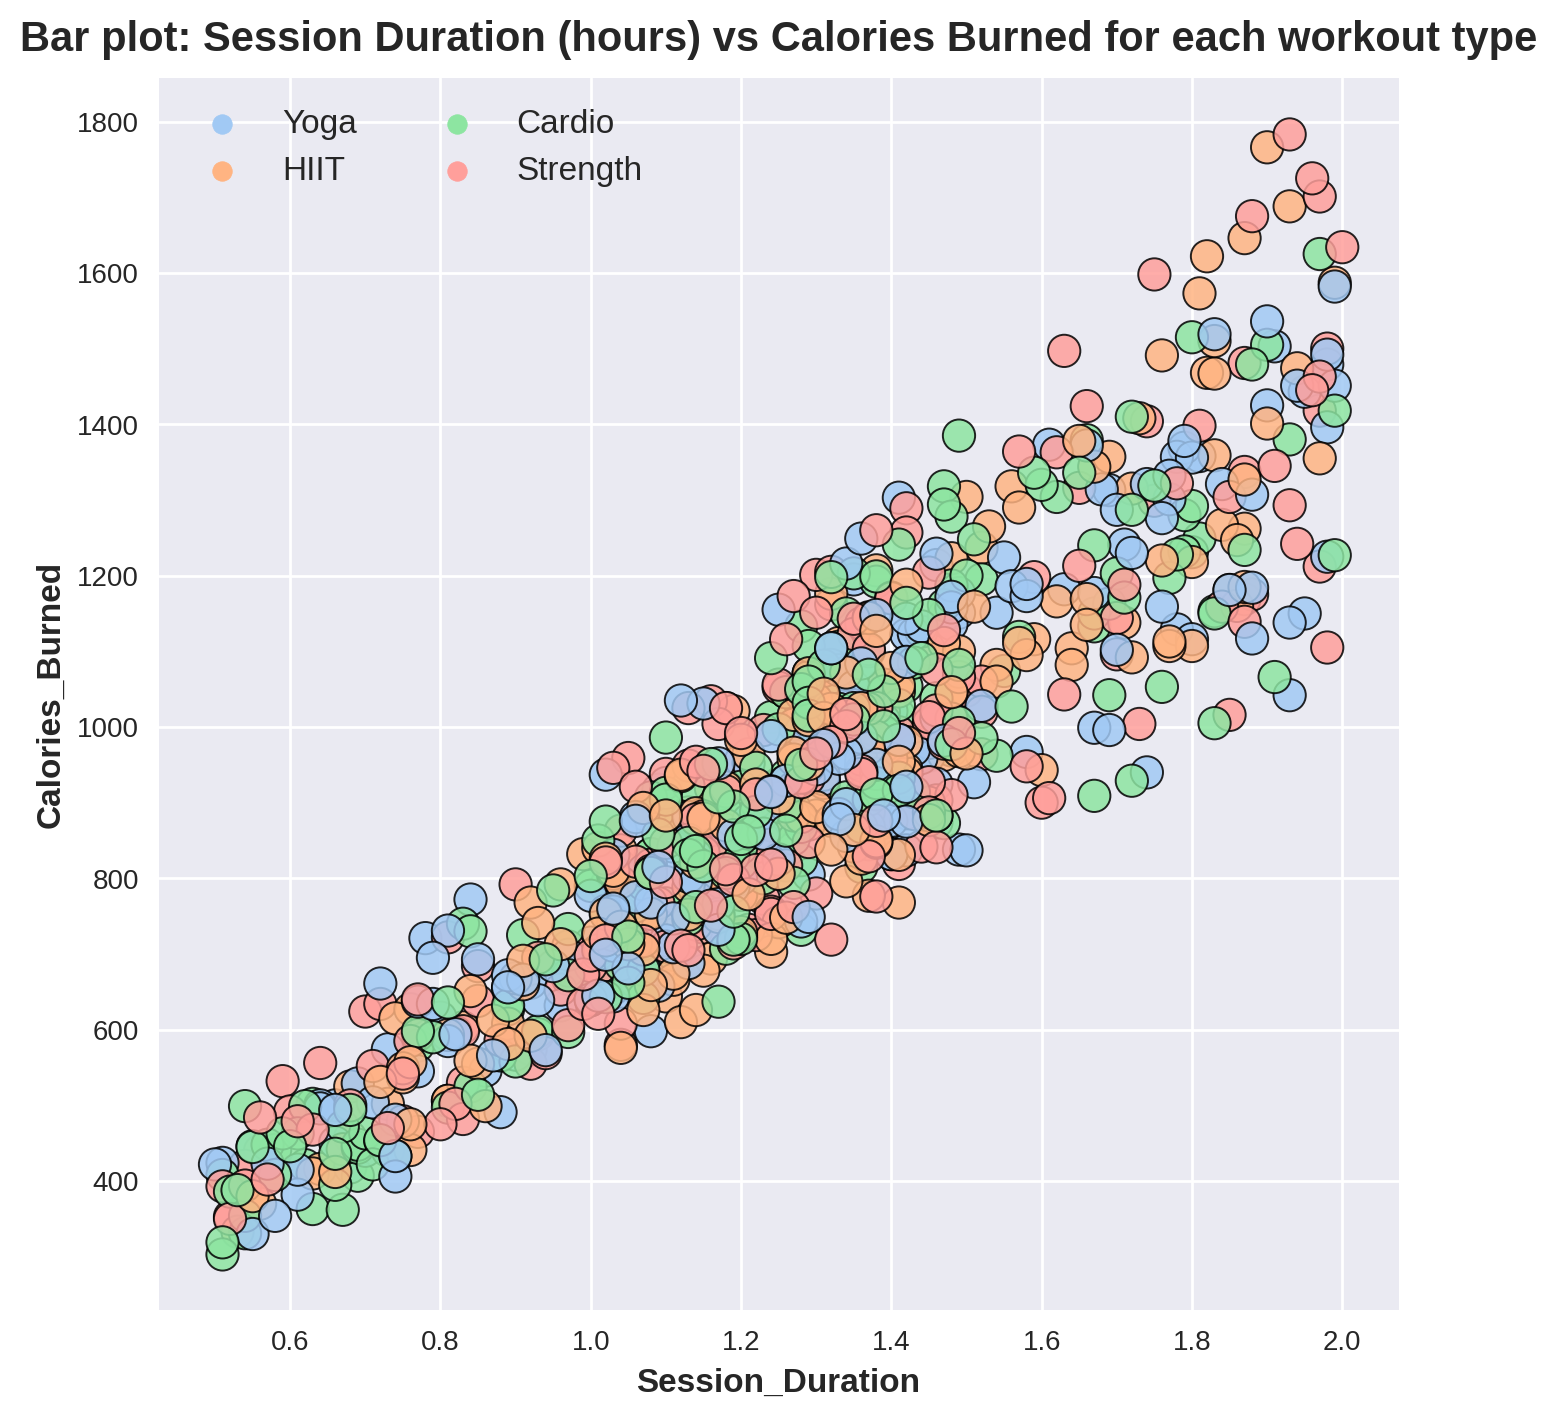

In [13]:
sns.scatterplot(x='Session_Duration', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='pastel', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Session Duration (hours) vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

The inferences we can make from the scatterplot is that there is a positive relationship between session duration and calories burned. The longer your session duration of the workout regardless of workout type, the more calories you burn.

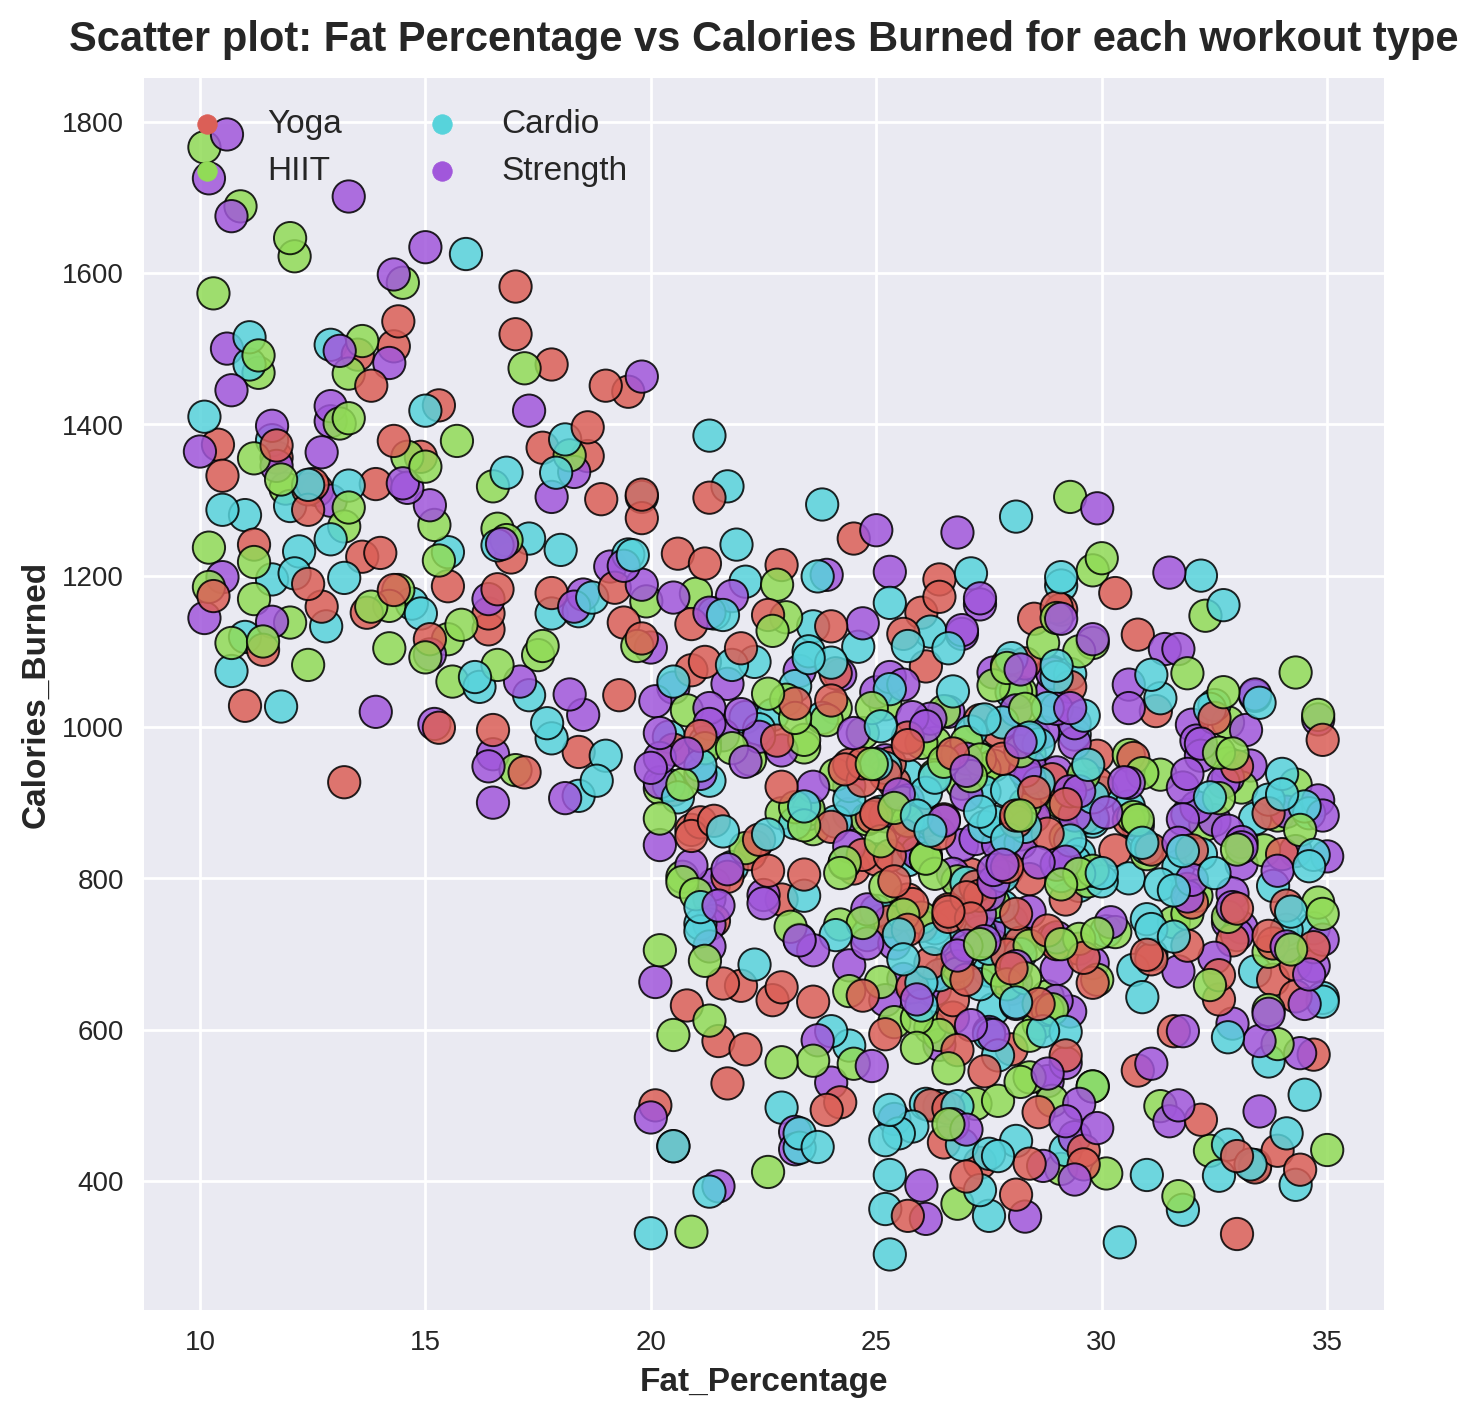

In [14]:
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='hls', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Scatter plot: Fat Percentage vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

From the scatterplot above, we can deduce that there is a negative relationship between fat percentage and calories burned.

In [15]:
bin_edges = np.linspace(1.5, 3.7, num=4)

df['Water_Intake'] = pd.cut(df['Water_Intake'], bins=bin_edges, include_lowest=True, labels=False)

In [16]:
df.sample(10)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
584   25  Female    55.3    1.76      176      152           67   
533   33  Female    74.2    1.76      192      145           66   
358   40    Male    51.7    1.82      161      160           71   
538   48    Male    83.9    1.82      176      149           70   
280   37    Male    48.7    1.67      164      132           74   
175   41    Male    64.8    1.71      164      131           54   
412   33    Male    81.8    1.99      184      137           51   
908   26    Male    51.9    2.00      173      133           54   
522   31  Female    48.2    1.65      163      166           60   
460   50  Female    69.7    1.72      198      135           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
584              1.56           1186.0         Yoga            15.5   
533              1.15            834.0     Strength            25.9   
358              0.90            792.0     Strength            21.4   
538              1.90           1401.0         HIIT            13.1   
280              1.39           1009.0         Yoga            27.3   
175              1.20            778.0     Strength            22.5   
412              1.59           1198.0     Strength            10.5   
908              0.75            549.0         HIIT            26.6   
522              1.10            913.0       Cardio            26.1   
460              1.24            753.0     Strength            27.3   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
584             1                  4                 3  17.85  
533             0                  4                 2  23.95  
358             2                  3                 1  15.61  
538             2                  5                 3  25.33  
280             2                  2                 1  17.46  
175             1                  3                 2  22.16  
412             2                  4                 3  20.66  
908             1                  2                 1  12.97  
522             1                  2                 1  17.70  
460             0                  4                 2  23.56

## Lmplot - Capturing Interaction effects

Text(0.5, 1.0, 'Interaction of Session and Water intake (litres) on calories burned')

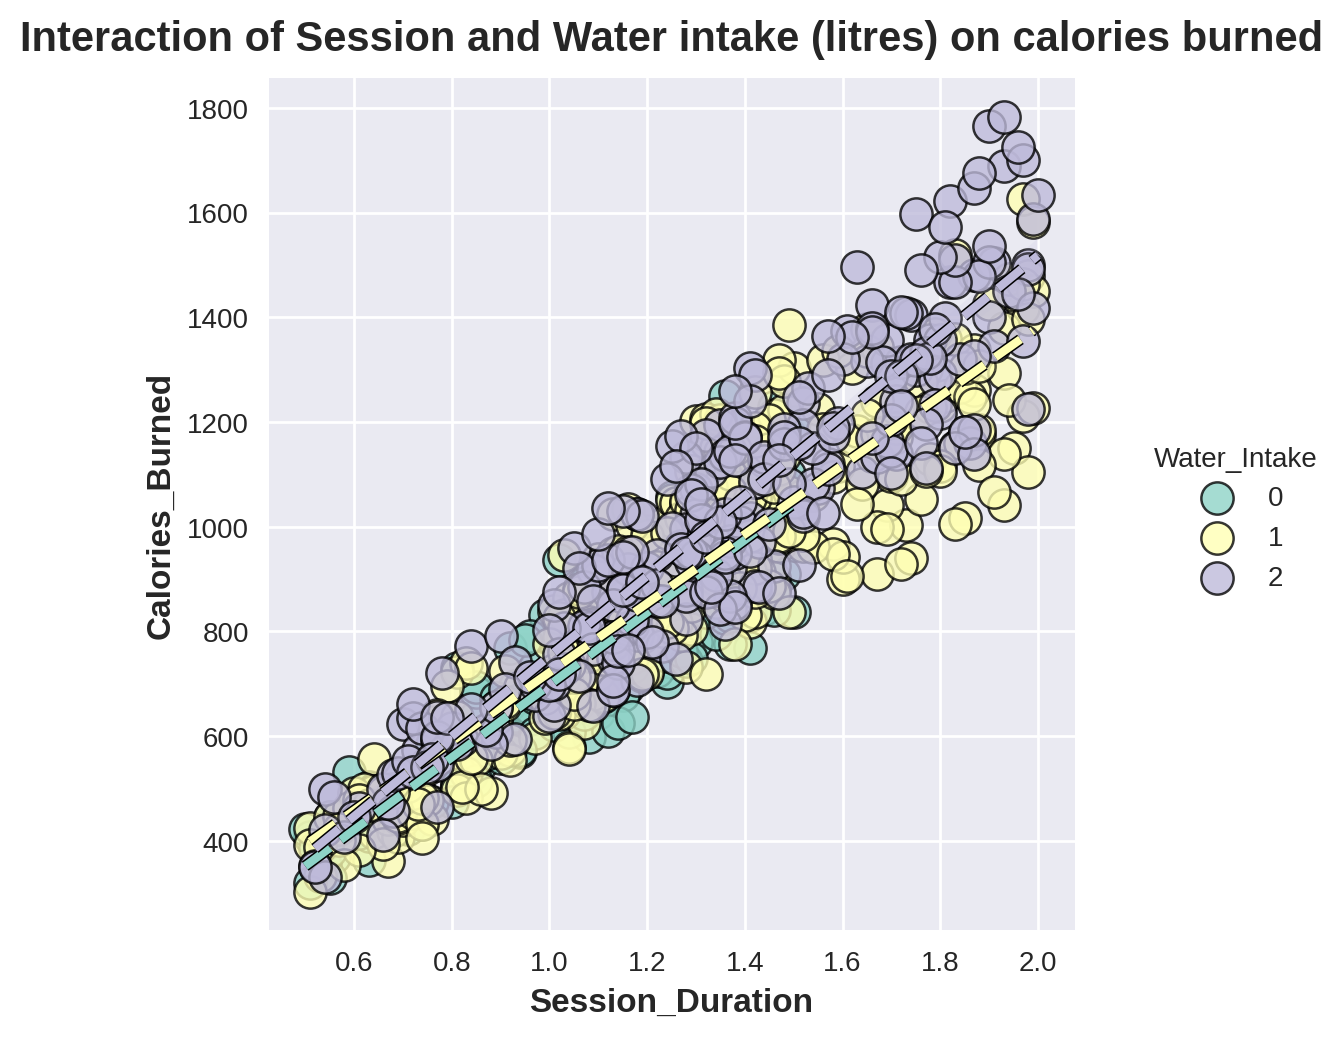

In [17]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Water_Intake',
palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.9, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and Water intake (litres) on calories burned")

The inferences we can make from this lmplot is that the longer we can workout, the more water we intake while burning calories. We can notice that regression of water intake of 2 (interval between 2.96667 and 3.7 litres) is steeper than other intervals.

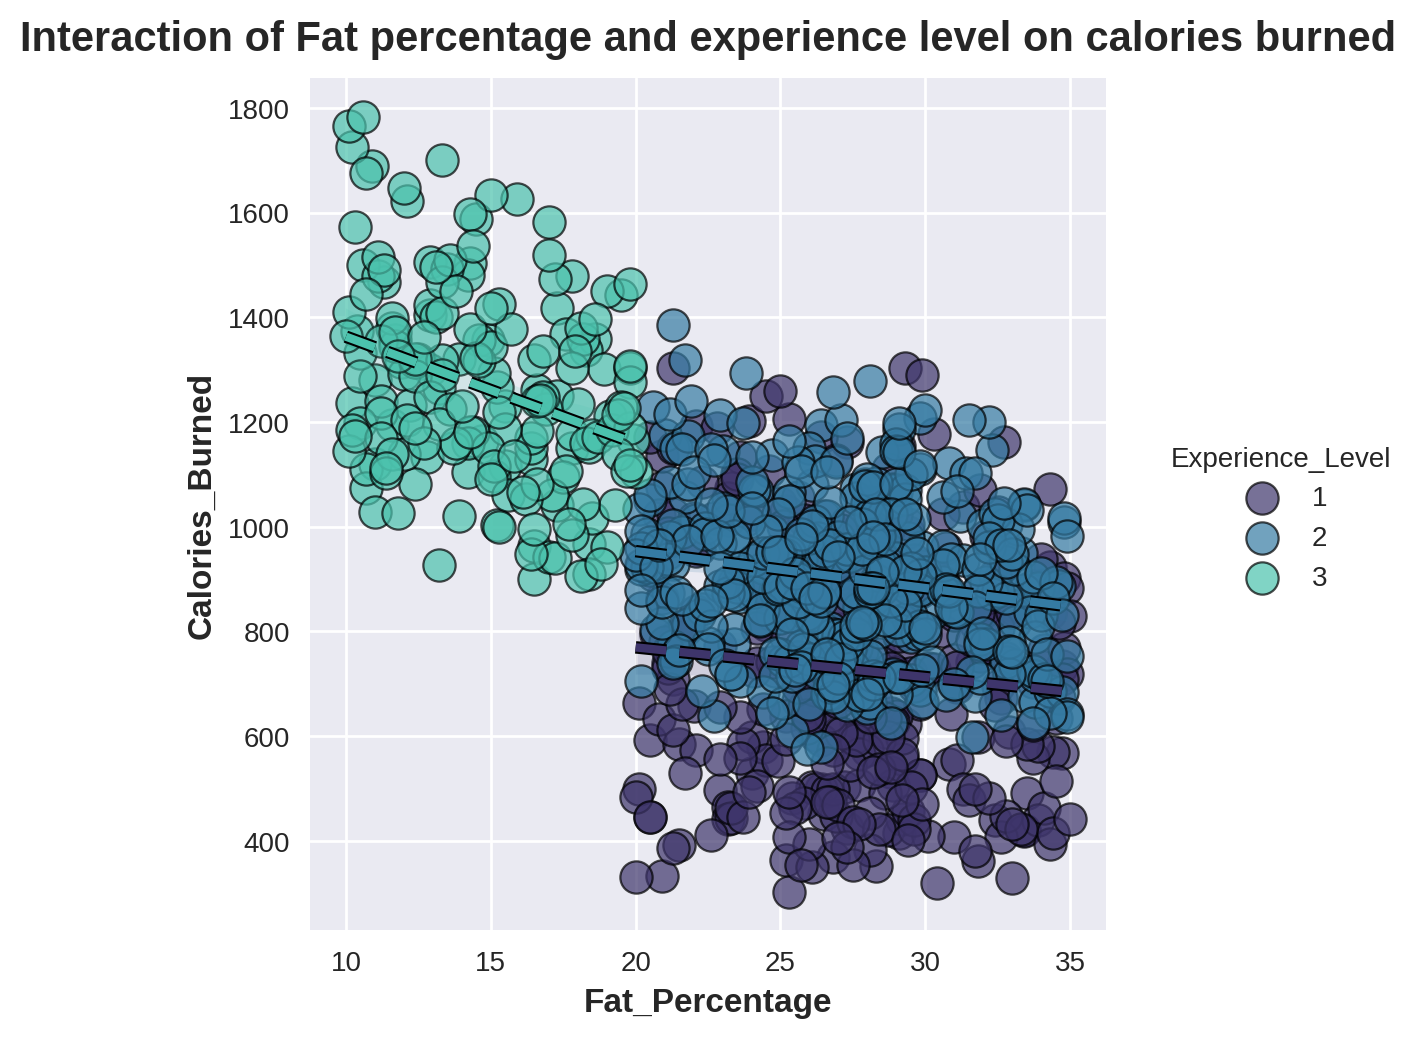

In [18]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Experience_Level', palette='mako', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.7},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.5, foreground='black')]})
plt.title("Interaction of Fat percentage and experience level on calories burned")
plt.show()

As we can see from lmplot that people with more experience level, burn more calories. Since the regression line for experience level of 3 years has a steeper line as compare to other experience levels. Though lines of experience of 1 and 2 years are parallel to each other, but the line of 2 years is higher than line of 1 year. Thus, proving my inferences correct.

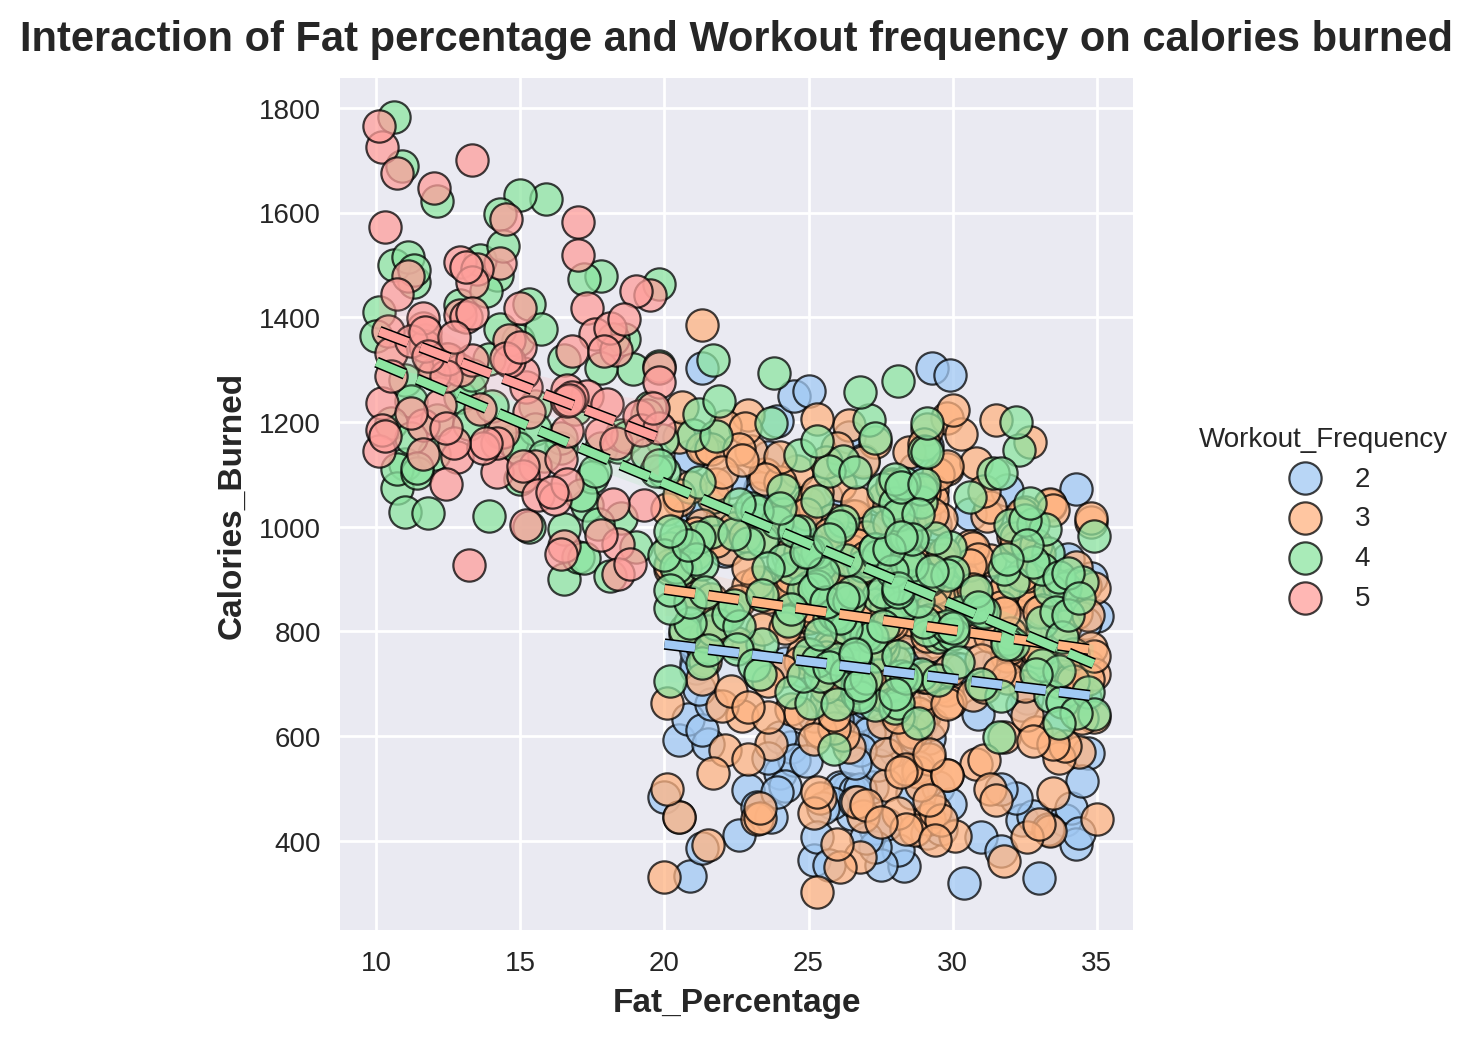

In [19]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Workout_Frequency', palette='pastel', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.75},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and Workout frequency on calories burned")
plt.show()

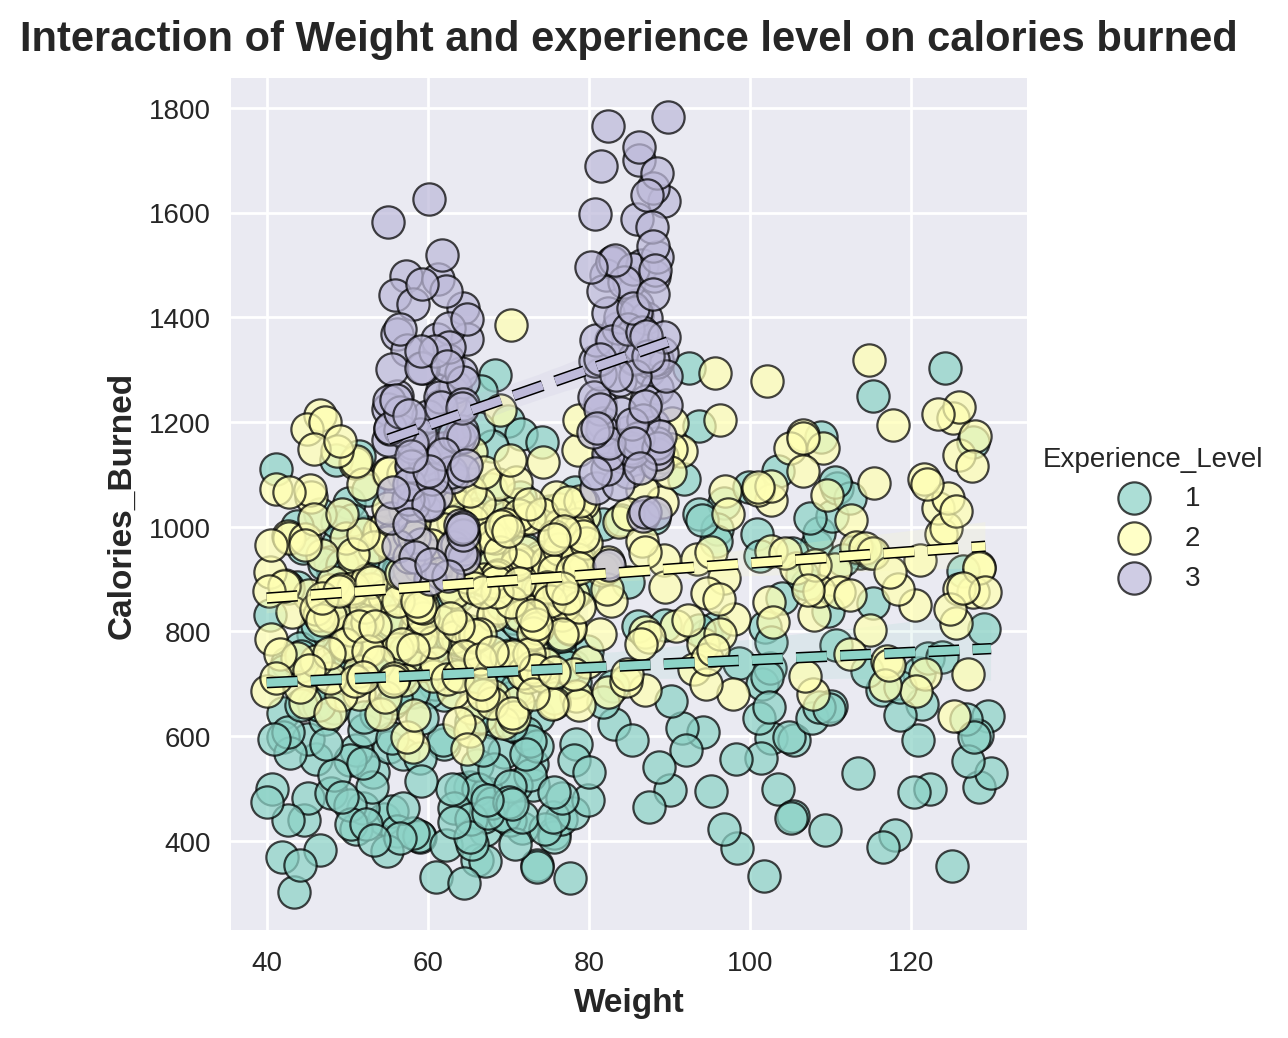

In [20]:
sns.lmplot(x='Weight', y='Calories_Burned', hue='Experience_Level', palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.73},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Weight and experience level on calories burned")
plt.show()

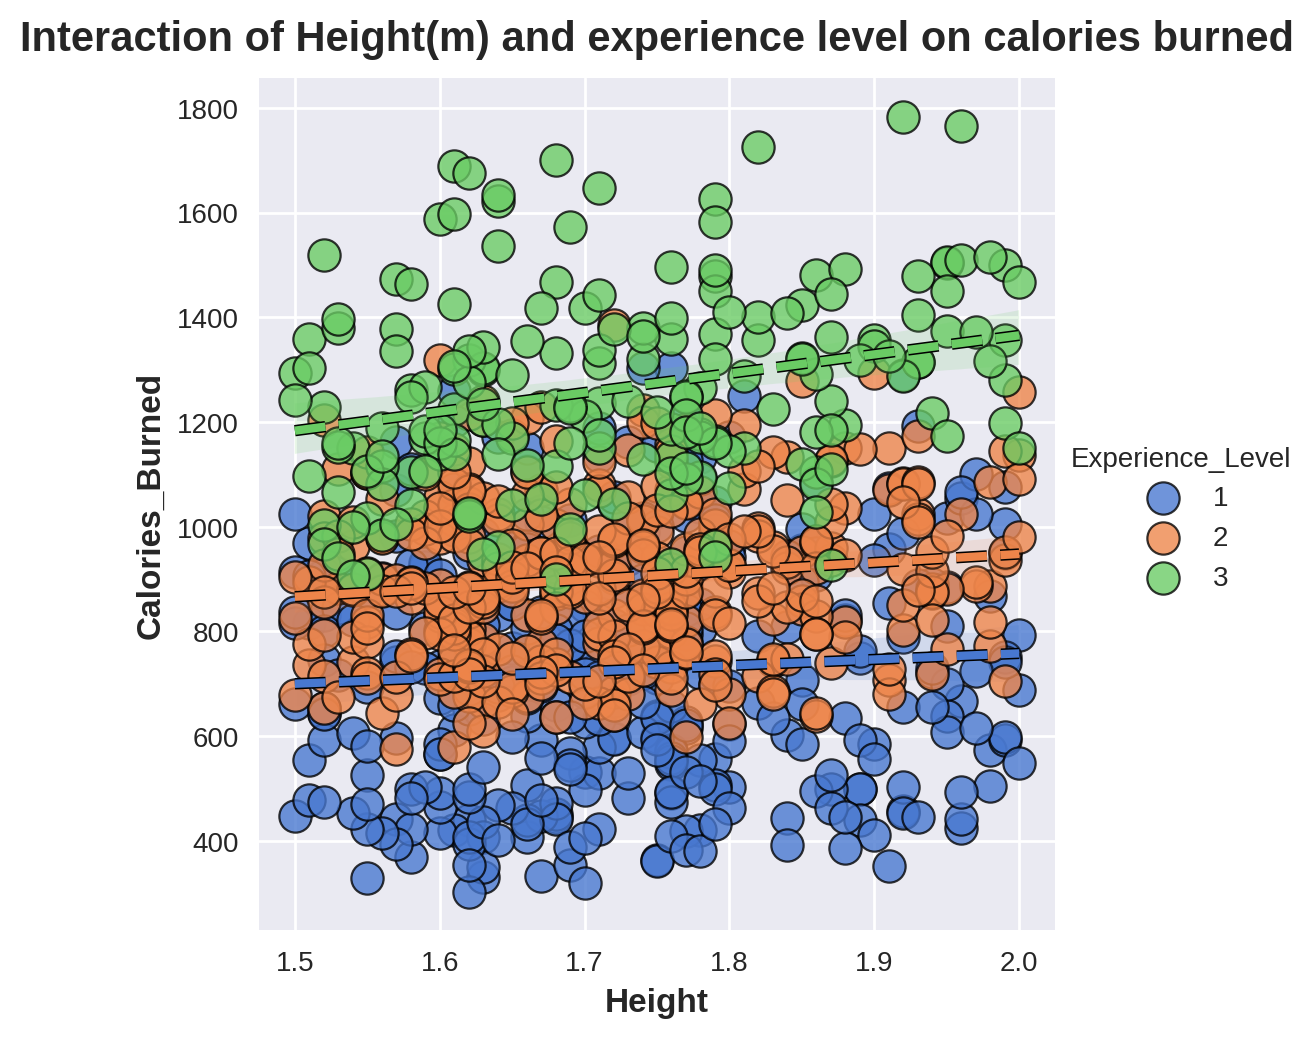

In [21]:
sns.lmplot(x='Height', y='Calories_Burned', hue='Experience_Level', palette='muted', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Height(m) and experience level on calories burned")
plt.show()

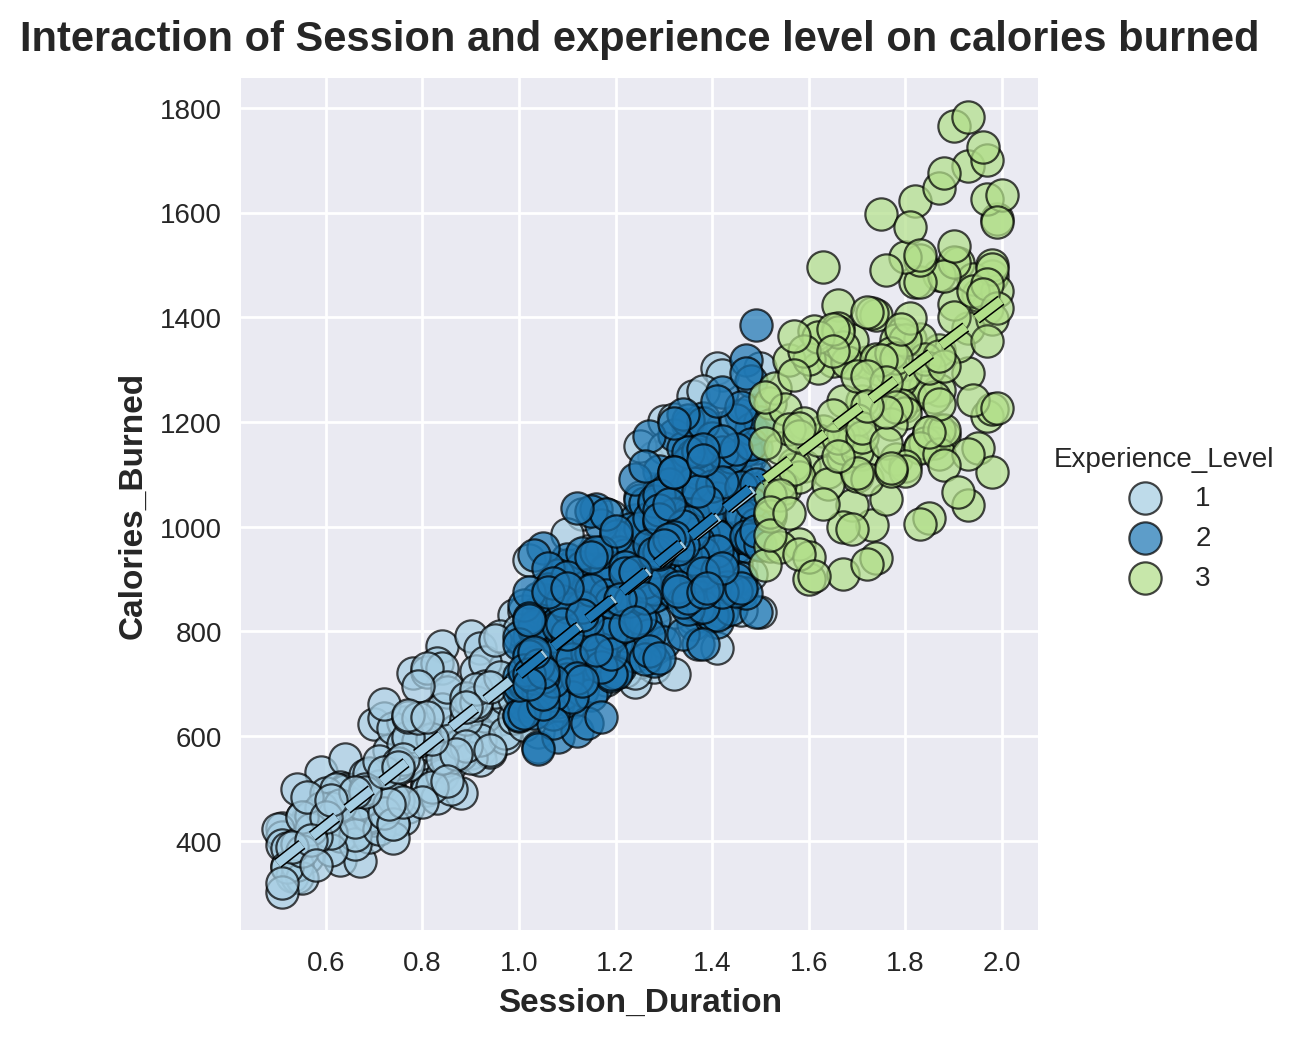

In [22]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Experience_Level', palette='Paired', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.72},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and experience level on calories burned")
plt.show()

Since the lines are overlapping, there is no category effect of experience level on the relationship between session duration and calories burned. Therefore, the relationship between session duration and calories burned is consistent across all workout types.

In [23]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

# Feature engineering

In [24]:
epsilon = 1e-6
df['BMI_experience'] = df['BMI'] * df['Experience_Level']
df['Weight_experience'] = df['Weight'] * df['Experience_Level']
df['Height_experience'] = df['Height'] * df['Experience_Level']
df['fat_experience'] = df['Fat_Percentage'] * df['Experience_Level']
df['experience_fat_ratio'] = df['Experience_Level'] / (df['Fat_Percentage'] + epsilon)
df['session_water'] = df['Session_Duration'] * df['Water_Intake']


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Workout_Type'] = le.fit_transform(df['Workout_Type'])


In [26]:
df.sample(5)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
937   22       1   107.4    1.74      195      138           63   
732   46       0    62.5    1.54      197      125           73   
863   45       1    80.8    1.76      183      131           54   
68    31       0    61.1    1.76      189      150           67   
362   19       0    50.6    1.68      193      145           64   

     Session_Duration  Calories_Burned  Workout_Type  Fat_Percentage  \
937              1.34           1017.0             2            22.0   
732              1.61            906.0             2            18.1   
863              1.70           1102.0             3            11.4   
68               1.81           1358.0             3            18.6   
362              1.21            877.0             3            30.6   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  BMI_experience  \
937             0                  2                 1  35.47           35.47   
732             1                  4                 3  26.35           79.05   
863             2                  4                 3  26.08           78.24   
68              1                  4                 3  19.72           59.16   
362             0                  3                 2  17.93           35.86   

     Weight_experience  Height_experience  fat_experience  \
937              107.4               1.74            22.0   
732              187.5               4.62            54.3   
863              242.4               5.28            34.2   
68               183.3               5.28            55.8   
362              101.2               3.36            61.2   

     experience_fat_ratio  session_water  
937              0.045455           0.00  
732              0.165746           1.61  
863              0.263158           3.40  
68               0.161290           1.81  
362              0.065359           0.00

# Model prediction

## Splitting the data into train and valid sets

In [27]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('Calories_Burned')
y = np.log(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=10)


## Using Standard Encoders to preprocess the train and valid sets

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## Random Forest Predictions

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=200, random_state=10)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_valid)
rfr_fit = rfr.predict(X_train)
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rfr_fit)):,.5f}')
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, rfr_pred)):,.5f}\n')
print(f'Train R2Score: {(r2_score(y_train, rfr_fit)):,.5f}')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')



Train RMSE: 0.01824
Valid RMSE: 0.04765

Train R2Score: 0.99670
Valid R2Score: 0.98085


## XGBRegressor

In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    random_state=10,
    learning_rate=0.05,
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)
print(f'Valid RMSE: {np.sqrt(mean_squared_error(y_valid, xgb_pred)):,.5f}\n')
print(f'Valid R2Score: {(r2_score(y_valid, rfr_pred)):,.5f}')

Valid RMSE: 0.03728

Valid R2Score: 0.98085
